In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
# Load the dataset
df = pd.read_csv('Datasets/insurance.csv')

In [4]:
# Display first few rows and basic information
print("First few rows of the dataset:")
print(df.head())
print("\nDataset Info:")
print(df.info())

First few rows of the dataset:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [5]:
print("\nBasic statistics:")
print(df.describe())


Basic statistics:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


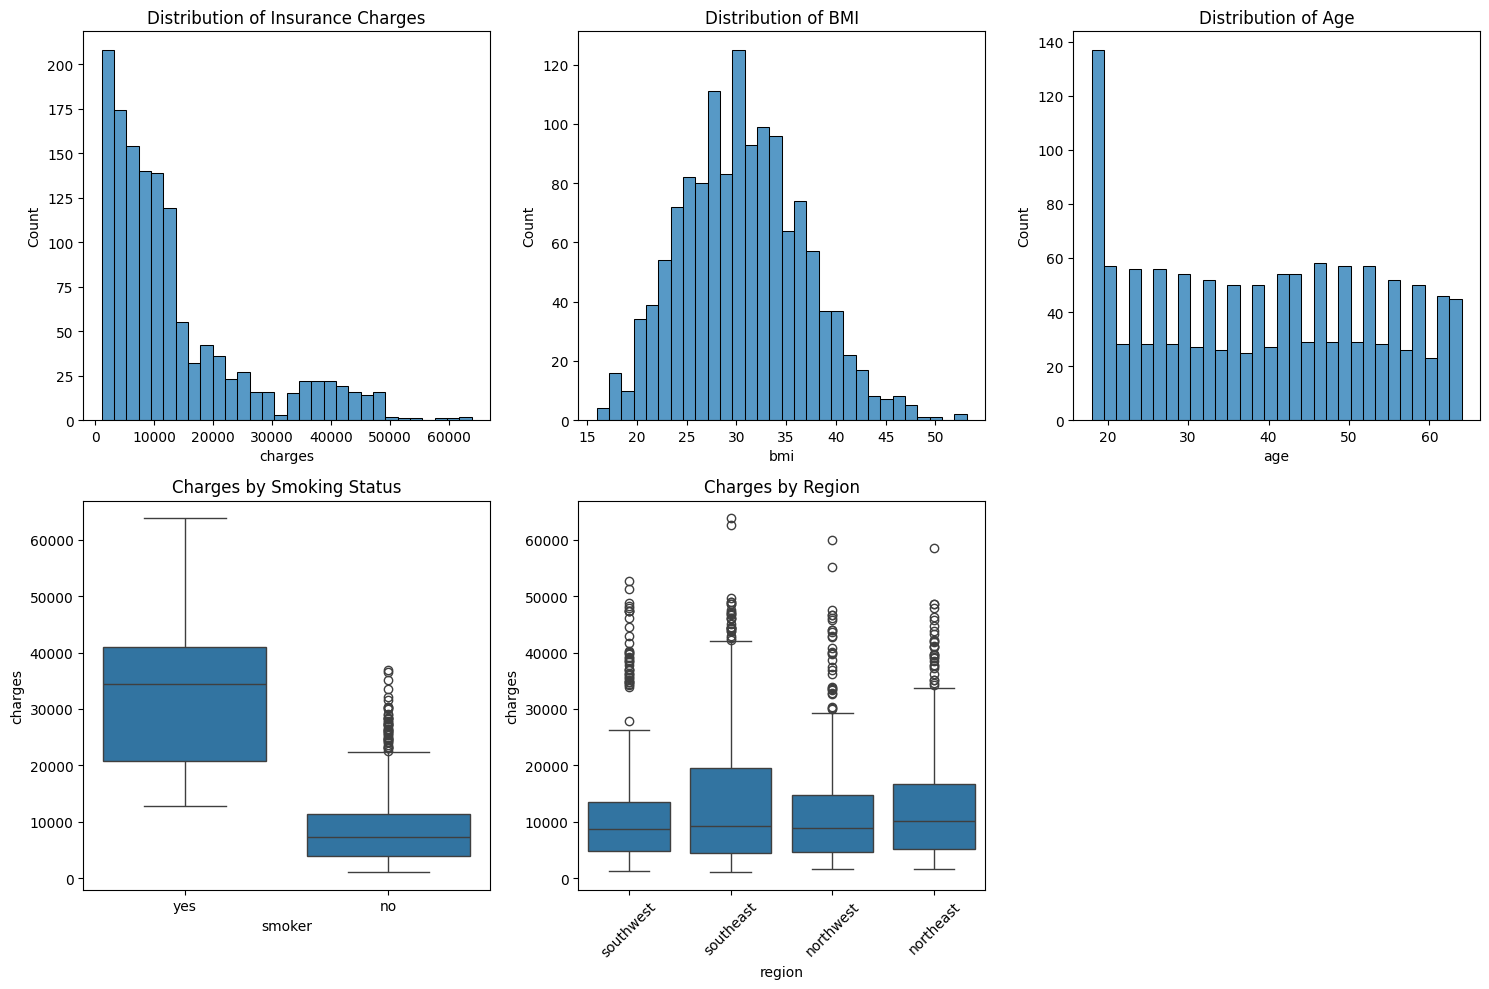

In [6]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(15, 10))

# Distribution of insurance charges
plt.subplot(2, 3, 1)
sns.histplot(data=df, x='charges', bins=30)
plt.title('Distribution of Insurance Charges')

# BMI distribution
plt.subplot(2, 3, 2)
sns.histplot(data=df, x='bmi', bins=30)
plt.title('Distribution of BMI')

# Age distribution
plt.subplot(2, 3, 3)
sns.histplot(data=df, x='age', bins=30)
plt.title('Distribution of Age')

# Charges by smoking status
plt.subplot(2, 3, 4)
sns.boxplot(data=df, x='smoker', y='charges')
plt.title('Charges by Smoking Status')

# Charges by region
plt.subplot(2, 3, 5)
sns.boxplot(data=df, x='region', y='charges')
plt.title('Charges by Region')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

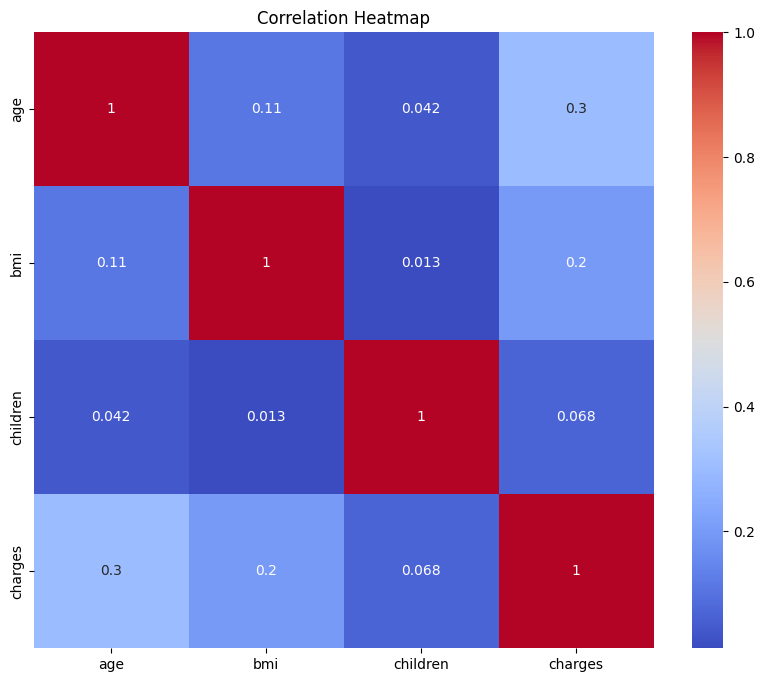

In [7]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
# Create correlation matrix for numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [8]:
# Data Preprocessing
# Convert categorical variables to numerical using Label Encoding
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])

# Separate features and target
X = df.drop('charges', axis=1)
y = df['charges']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [10]:
# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance Metrics:")
print(f"Mean Absolute Error: ${mae:.2f}")
print(f"Mean Squared Error: ${mse:.2f}")
print(f"Root Mean Squared Error: ${rmse:.2f}")
print(f"R² Score: {r2:.3f}")


Model Performance Metrics:
Mean Absolute Error: $4186.51
Mean Squared Error: $33635210.43
Root Mean Squared Error: $5799.59
R² Score: 0.783


In [11]:
# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print("\nFeature Importance:")
print(feature_importance.sort_values(by='Coefficient', key=abs, ascending=False))


Feature Importance:
    Feature   Coefficient
4    smoker  23647.818096
3  children    425.091456
2       bmi    335.781491
5    region   -271.284266
0       age    257.056264
1       sex    -18.791457


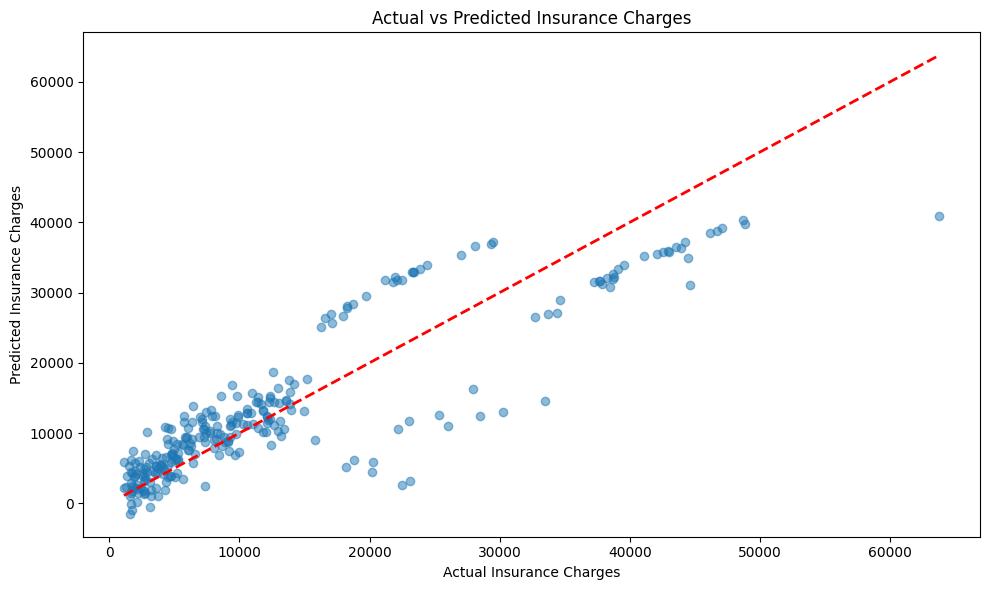

In [12]:
# Visualize actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Insurance Charges')
plt.ylabel('Predicted Insurance Charges')
plt.title('Actual vs Predicted Insurance Charges')
plt.tight_layout()
plt.show()

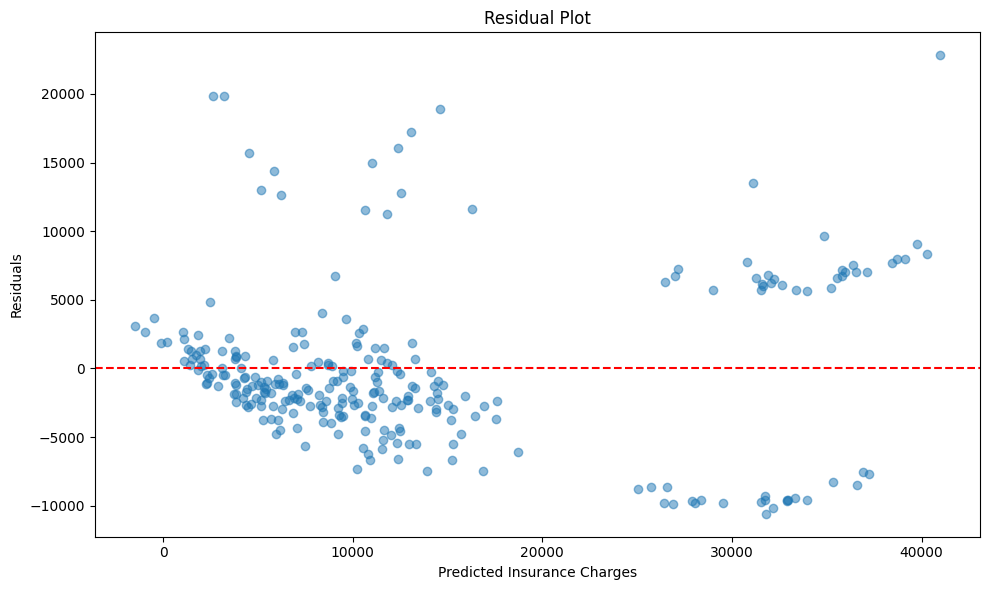

In [13]:
# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Predicted Insurance Charges')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.tight_layout()
plt.show()